In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import simtk.openmm as mm
from torsionfit import TorsionScanSet as ScanSet
import torsionfit.TorsionFitModel as Model
from torsionfit import sqlite_plus
from pymc import MCMC
from parmed.charmm import CharmmParameterSet
from torsionfit import plots

In [5]:
param = CharmmParameterSet('../data/charmm_ff/top_all36_cgenff.rtf', '../data/charmm_ff/par_all36_cgenff.prm')
structure = 'butane.psf'
scan = 'butane_scan_b3lyp_4.log'

In [6]:
butane_scan = ScanSet.parse_psi4(scan, structure)
butane_scan.compute_energy(param)

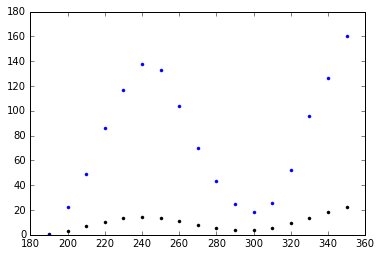

In [7]:
plt.plot(butane_scan.steps, butane_scan.qm_energy, 'k.')
plt.plot(butane_scan.steps, butane_scan.mm_energy, '.')

In [8]:
platform = mm.Platform.getPlatformByName('Reference')

In [9]:
model = Model.TorsionFitModelEliminatePhase(param, butane_scan, platform=platform, 
                                            param_to_opt=[('CG331', 'CG321', 'CG321', 'CG331')])

In [11]:
sampler = MCMC(model.pymc_parameters, db=sqlite_plus, dbname='butane.database', verbose=5)

In [12]:
sampler.sample(100000)

Assigning step method DiscreteMetropolis to stochastic CG331_CG321_CG321_CG331_multiplicity_bitstring
Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_6_K
Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_4_K
Assigning step method Metropolis to stochastic BUTA1_offset
Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_1_K
Assigning step method Metropolis to stochastic log_sigma
Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_2_K
Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_3_K
 [-----------------100%-----------------] 100000 of 100000 complete in 3011.3 sec

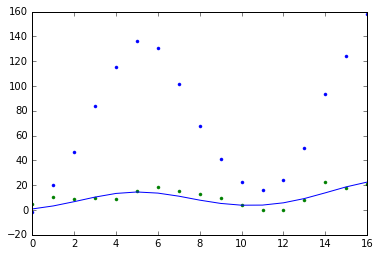

In [13]:
plt.plot(sampler.trace('mm_energy')[0], 'b.')
plt.plot(butane_scan.mm_energy, 'g.')
plt.plot(butane_scan.qm_energy)

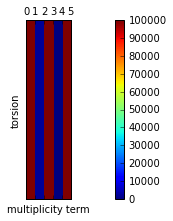

In [15]:
plots.marg_mult(model, sampler, 100000, 0, 'multiplicity.png')

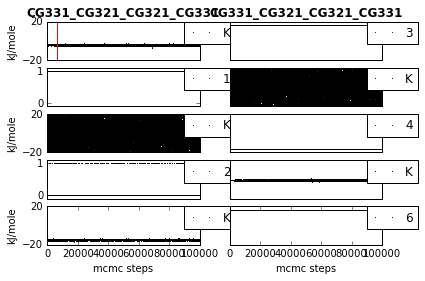

In [16]:
plots.trace_no_phase('CG331_CG321_CG321_CG331', sampler, markersize=1.0)

In [17]:
from pymc import database

In [18]:
db = sqlite_plus.load('butane.database')

In [23]:
len(db.mm_energy[:])

100000